In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
Data=pd.read_csv('/Users/alok.g.v/Desktop/project/train-chennai-sale.csv')
Data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# DATA CLEANING
## Check for unique labels in the catagorical labels


In [4]:

value_count=['SALE_COND','AREA','N_ROOM','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','BUILDTYPE']
for i in value_count:
    print("Value Count of ", i,'\n')
    print(Data[i].value_counts())
    print('\n\n')

Value Count of  SALE_COND 

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64



Value Count of  AREA 

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64



Value Count of  N_ROOM 

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64



Value Count of  PARK_FACIL 

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64



Value Count of  UTILITY_AVAIL 

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64



Value Count of  STREET 

Paved  

# Cleaning the Spelling error



In [5]:


Data["AREA"].replace(['Chrompt','Chormpet','Chrmpet'],'Chrompet',inplace=True)
Data["AREA"].replace(['Karapakam'],'Karapakkam',inplace=True)
Data["AREA"].replace(['KKNagar'],'KK Nagar',inplace=True)
Data["AREA"].replace(['Velchery'],'Velachery',inplace=True)
Data["AREA"].replace(['Ann Nagar','Ana Nagar'],'Anna Nagar',inplace=True)
Data["AREA"].replace(['Adyr'],'Adyar',inplace=True)
Data["AREA"].replace(['TNagar'],'T Nagar',inplace=True)

Data["PARK_FACIL"].replace(['Noo'],'No',inplace=True)

Data["UTILITY_AVAIL"].replace(['All Pub'],'AllPub',inplace=True)

Data["STREET"].replace(['Pavd'],'Paved',inplace=True)
Data["STREET"].replace(['NoAccess'],'No Access',inplace=True)

Data["BUILDTYPE"].replace(['Other'],'Others',inplace=True)
Data["BUILDTYPE"].replace(['Comercial'],'Commercial',inplace=True)

Data["SALE_COND"].replace(['Adj Land'],'AdjLand',inplace=True)
Data["SALE_COND"].replace(['Partiall','PartiaLl'],'Partial',inplace=True)
Data["SALE_COND"].replace(['Ab Normal'],'AbNormal',inplace=True)


for i in value_count:
    print("Value Count of ", i,'\n')
    print(Data[i].value_counts())
    print('\n\n')

Value Count of  SALE_COND 

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64



Value Count of  AREA 

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64



Value Count of  N_ROOM 

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64



Value Count of  PARK_FACIL 

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64



Value Count of  UTILITY_AVAIL 

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64



Value Count of  STREET 

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64



Value Count of  MZZONE 

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64



Value Count of  BUILDTYPE 

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE

# We can observe missing values in the Overall Quality



The numner of missing values in QS overall is : 48





(array([  42.,  258.,  656., 1041., 1434., 1425., 1159.,  700.,  282.,
          64.]),
 array([2.   , 2.297, 2.594, 2.891, 3.188, 3.485, 3.782, 4.079, 4.376,
        4.673, 4.97 ]),
 <BarContainer object of 10 artists>)

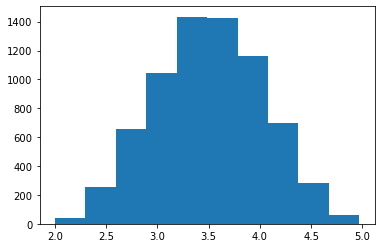

In [6]:

print("The numner of missing values in QS overall is :",Data['QS_OVERALL'].isnull().sum() )
print("\n\n")
plt.hist(x=Data.QS_OVERALL)


# Obtaining the missing vaules in Overall Quality Index using KNN Regressor



In [7]:


from sklearn.neighbors import KNeighborsRegressor

QS_Data=Data[['INT_SQFT','N_ROOM','QS_OVERALL']]
QS_Data_train=QS_Data[QS_Data['QS_OVERALL'].isnull()==False]
QS_Data_test=QS_Data[QS_Data['QS_OVERALL'].isnull()==True]
x_train=QS_Data_train.drop("QS_OVERALL",axis=1)
y_train=QS_Data_train.QS_OVERALL
x_test=QS_Data_test.drop("QS_OVERALL",axis=1)

KNN=KNeighborsRegressor(n_neighbors=3)

KNN=KNN.fit(x_train,y_train)

y_test=KNN.predict(x_test)

QS_Data_test["QS_OVERALL"]=y_test

QS_Data_test.head()


<ipython-input-7-a37018e7440a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QS_Data_test["QS_OVERALL"]=y_test


,INT_SQFT,N_ROOM,QS_OVERALL
15,1868,5,3.290000
46,1882,5,3.365000
86,1085,3,3.440000
111,1034,3,3.133333
134,1942,5,3.623333


# Replacing the null Values with values obtained from KNN Modeling 



In [8]:

repl=QS_Data_test.index
i=0
for x in repl:
    Data['QS_OVERALL'].loc[x]=y_test[i]
    i+=1

Data['QS_OVERALL'].isnull().sum()

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

# Calculating the Age of the Building and adding the data to the dataset 

In [9]:
df_date=pd.DataFrame()
df_date['Sold']=pd.DatetimeIndex(Data['DATE_SALE']).year
df_date['Built']=pd.DatetimeIndex(Data['DATE_BUILD']).year
df_date['AOB']=df_date['Sold']-df_date['Built']
Data['Building_Age']=df_date['AOB']
Data['Building_Age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: Building_Age, Length: 7109, dtype: int64

In [10]:
Data_copy=Data.copy(deep=True)


In [11]:
Data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Building_Age
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503199,376938.330708,141005.726544,1.089491e+07,24.276270
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.525986,143070.662010,78768.093718,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.885000,451562.000000,184506.000000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,55.000000


# Bar Plot to understand the relation ship between Area and Sales Price

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

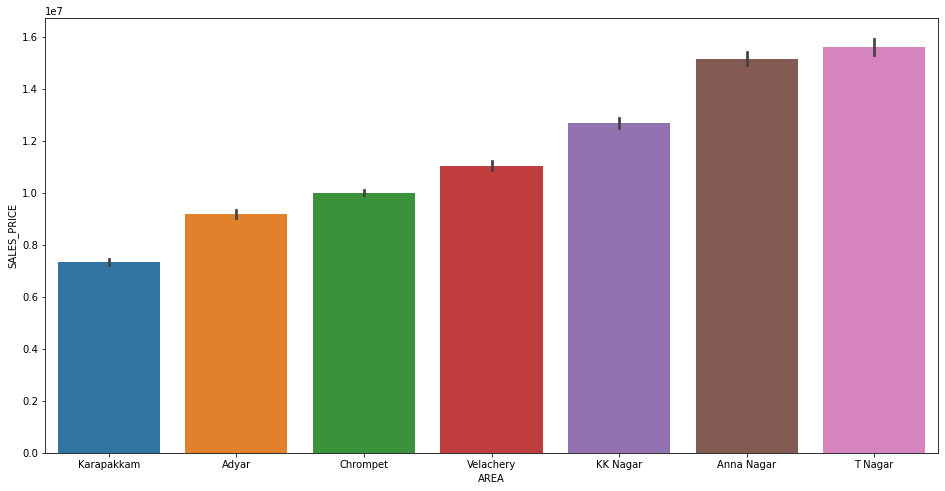

In [12]:
plt.figure(figsize=(16,8))
result=Data.groupby(['AREA'])['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values("SALES_PRICE")
sns.barplot(x='AREA',y='SALES_PRICE',data=Data,order=result['AREA'])

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

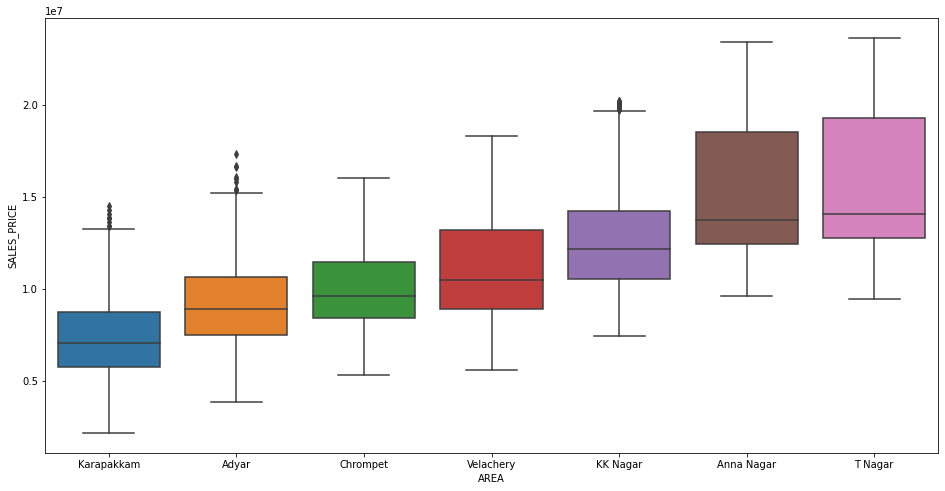

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x='AREA', y='SALES_PRICE', data=Data,order=result['AREA'])

# OBSERVATION
## 1. We see an increase in price as we go from Karapakkam to T-Nagar
 ## We can label encode the Area data in the format 
 ## Karapakkam :0 , Adyar :1, Chrompet : 2 ,Velanchery : 3 , KK Nagar : 4 , Anna Nagar : 5 , T Nagar : 6

# Plots to understand the relationship between Sq Feet and Sales price
## 1.Scatter plot of SQ FT VS Sales Price
## 2.Histogram to view the distribution of SQ FT accross the dataset 

(array([ 339.,  962., 1040., 1045.,  421., 1270., 1087.,  597.,  164.,
         184.]),
 array([ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
        2300., 2500.]),
 <BarContainer object of 10 artists>)

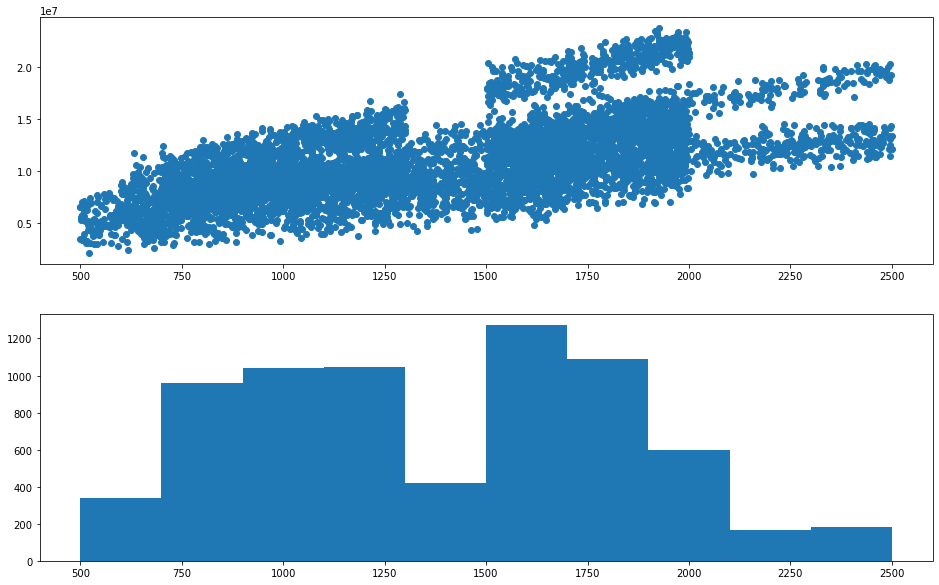

In [14]:
fig,ax=plt.subplots(2,figsize=(16,10))
ax[0].scatter(x='INT_SQFT',y='SALES_PRICE',data=Data)
ax[1].hist(Data['INT_SQFT'])


# OBSERVATION
## 1. There is a linear relationship between SQ FT and Sales price
## 2. The dataset has more data of houses between 1500 and 1750 SQFT
## 3. There is a dip in Sales price of house with SQFT between 1250 and 1500

# RELATIONSHIP BETWEEN DISTANCE FROM MAIN ROAD AND SALES PRICE  

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

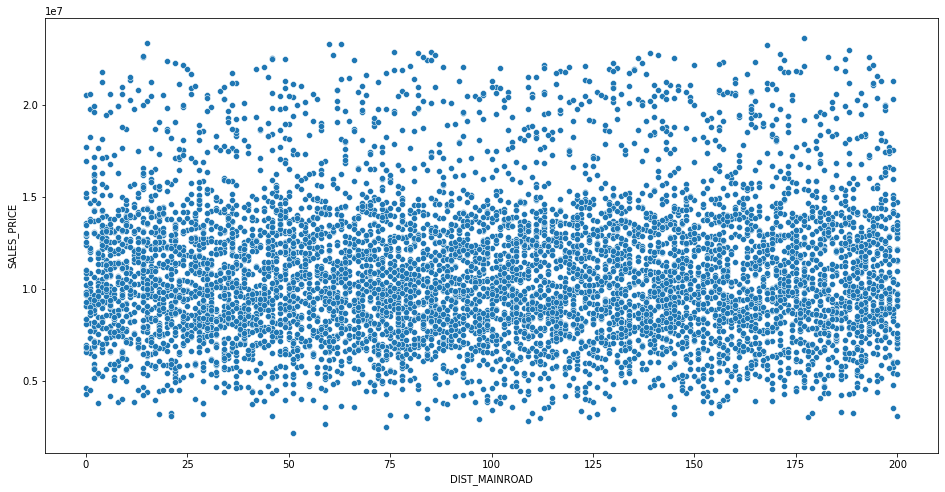

In [15]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',data=Data)

# OBSERVATION
   ## 1.We cannot see any relationship between Distance from main road and Sales Price.
   ## We can avoid using the Distance from main road data in out model preparations 

# RELATIONSHIP BETWEEN SALES CONDITION AND SALES PRICE


,SALE_COND,SALES_PRICE
4,Partial,1.061637e+07
2,Family,1.073642e+07
0,AbNormal,1.091463e+07
3,Normal Sale,1.099418e+07
1,AdjLand,1.120931e+07


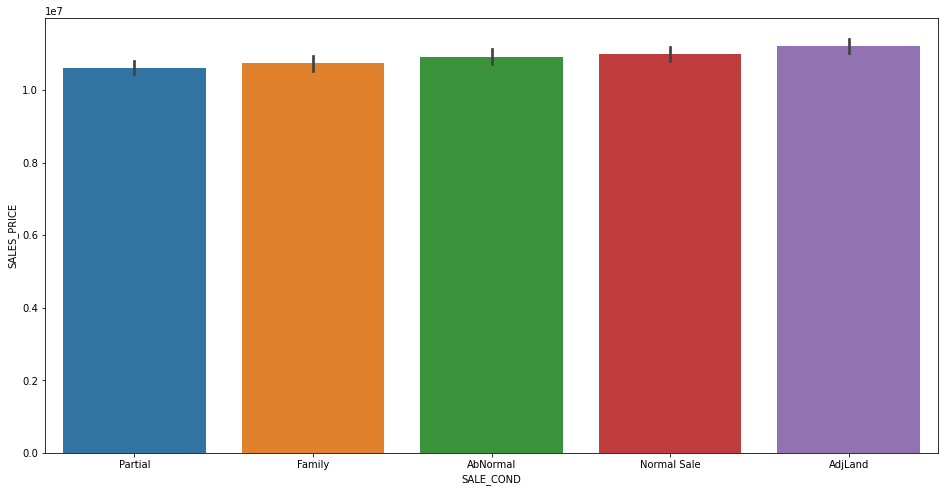

In [16]:
plt.figure(figsize=(16,8))
result=Data.groupby('SALE_COND')['SALES_PRICE'].agg(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=Data,order=result['SALE_COND'])
result

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

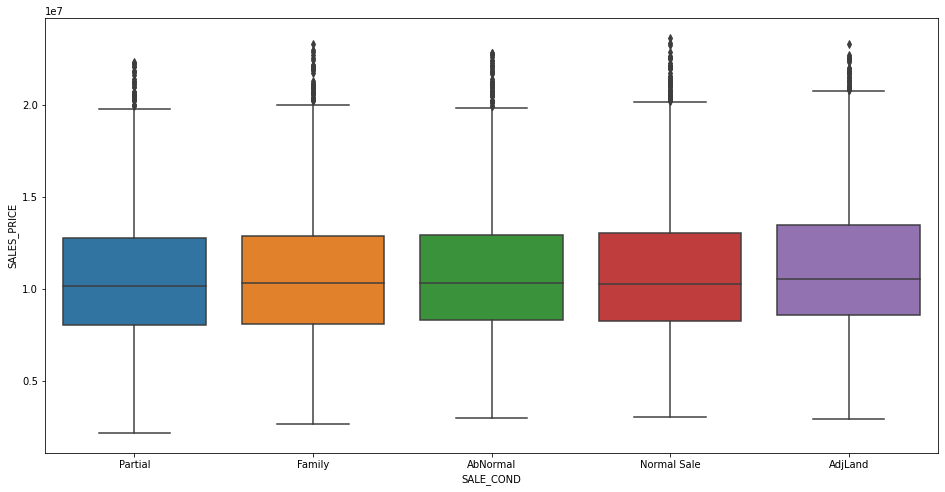

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(x='SALE_COND', y='SALES_PRICE', data=Data,order=result['SALE_COND'])

# OBSERVATION
  ## We can see a slight increase as we move from partial to adjland but too small of a differnce to be used for modeling 
    

# RELATIONSHIP BETWEEN PARK FACILITIES AND SALES PRICE 

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

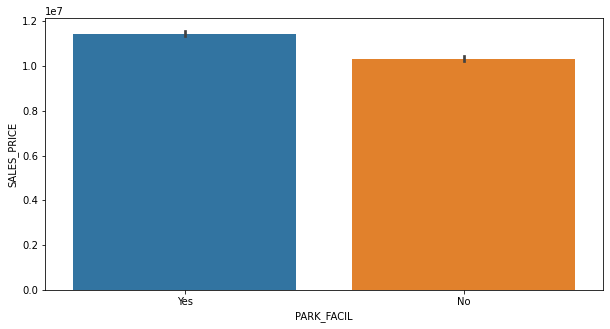

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=Data)

# OBSERVATION
   ## We can see an increase in sales price for house which have a park close by.
   ## we can lable encode with the format 
   ## Yes : 1 , No : 0
   ## and prepare the model.

# RELATIONSHIP BETWEEN STREET CONDITION AND SALES PRICE

,STREET,SALES_PRICE
1,No Access,1.000074e+07
2,Paved,1.105754e+07
0,Gravel,1.144462e+07


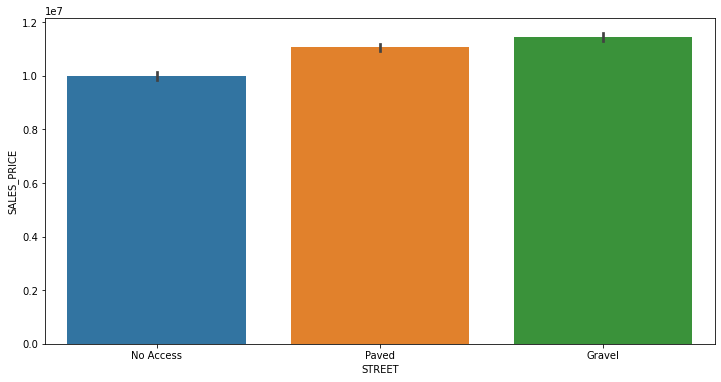

In [19]:
plt.figure(figsize=(12,6))
result=Data.groupby('STREET')['SALES_PRICE'].agg(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(x='STREET',y='SALES_PRICE',data=Data,order=result['STREET'])
result

# OBSERVATION 
   ## We can see that homes with Gravel road access has higher selling price followed by paved roads.
   ## We can label encode with the format No Access : 0 , Paved :1 ,Gravel : 2 
   ## and prepare the model.

# RELATIONSHIP BETWEEN BUILDING TYPE AND SALES PRICE

,BUILDTYPE,SALES_PRICE
1,House,9.098847e+06
2,Others,9.807998e+06
0,Commercial,1.386984e+07


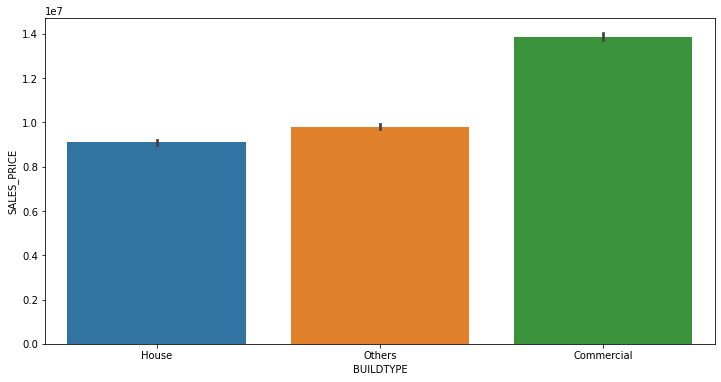

In [20]:
plt.figure(figsize=(12,6))
result=Data.groupby('BUILDTYPE')['SALES_PRICE'].agg(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=Data,order=result['BUILDTYPE'])
result

# OBSERVATION
   ## We can observe commercial properties have a highest selling price followed by other Buildtype (maybe a combination of both commercial and residential property) .
   ## We can label encode with the format House : 0 , other :1 ,Commercial : 2 
   ## and prepare the model.

# RELATIONSHIP BETWEEN UTILITY AVAILABLE AND SALES PRICE

,UTILITY_AVAIL,SALES_PRICE
1,ELO,1.046941e+07
2,NoSeWa,1.089308e+07
3,NoSewr,1.092576e+07
0,AllPub,1.121002e+07


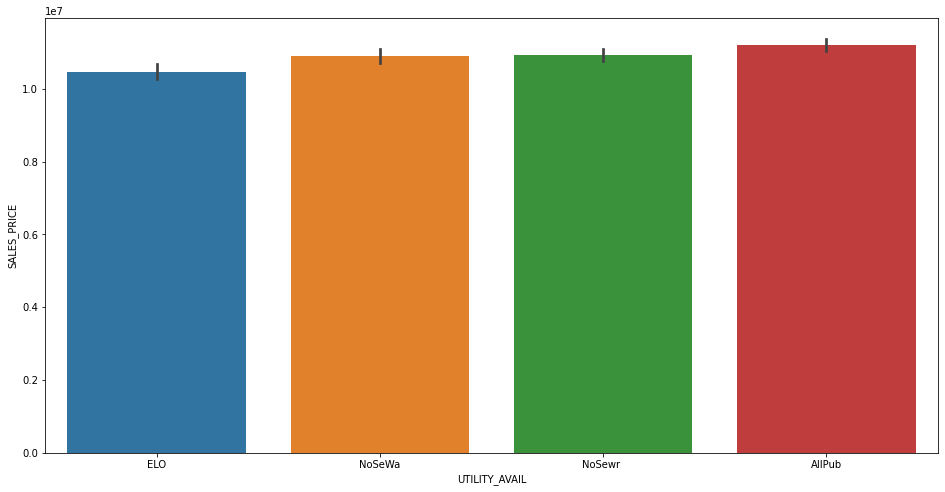

In [21]:
plt.figure(figsize=(16,8))
result=Data.groupby('UTILITY_AVAIL')['SALES_PRICE'].agg(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=Data,order=result['UTILITY_AVAIL'])
result

# OBSERVATION
   ## We can observe properties with All Amenities have a highest selling price followed by NoSewr,NoSeWa,ELO
   ## We can label encode with the format ELO : 0 , NoSewr :1 ,NoSeWa : 2 ,Allpub : 3
   ## and prepare the model.

# RELATIONSHIP BETWEEN MZZONE AND SALES PRICE

,MZZONE,SALES_PRICE
0,A,7.292591e+06
1,C,8.052270e+06
2,I,8.738633e+06
3,RH,1.103997e+07
4,RL,1.176576e+07
5,RM,1.240707e+07


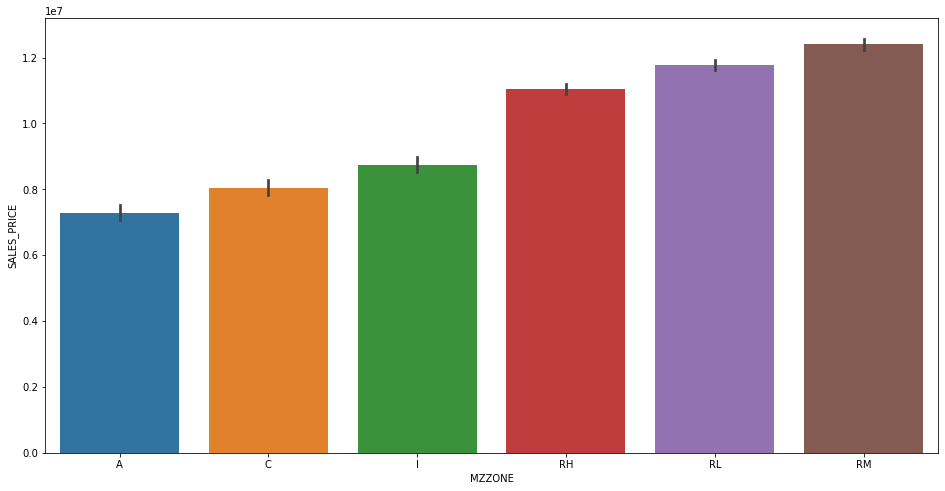

In [22]:
plt.figure(figsize=(16,8))
result=Data.groupby('MZZONE')['SALES_PRICE'].agg(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(x='MZZONE',y='SALES_PRICE',data=Data,order=result['MZZONE'])
result

# OBSERVATION
   ## We can observe properties which come under RM have a highest selling price followed by RL,RH,I,C,A accordingly 
   ## We can label encode with the format A : 0 , C :1 , I : 2 , RH : 3 , RL : 4, RM : 5
   ## and prepare the model.

# RELATIONSHIP BETWEEN TOTAL QUALITY INDEX AND SALES PRICE

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

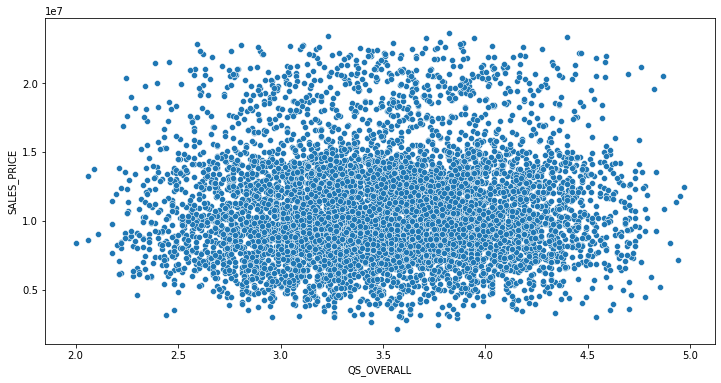

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='QS_OVERALL',y='SALES_PRICE',data=Data)

<AxesSubplot:xlabel='QS_OVERALL', ylabel='Count'>

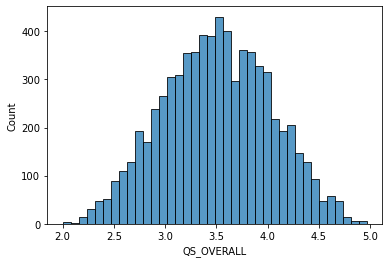

In [24]:
sns.histplot(x='QS_OVERALL',data=Data)

# OBSERVATION
   ## We cannnot observer and linear relationship between quality index and sales price

# RELATIONSHIP BETWEEN BUILDING AGE AND SALES PRICE

<AxesSubplot:xlabel='Building_Age', ylabel='SALES_PRICE'>

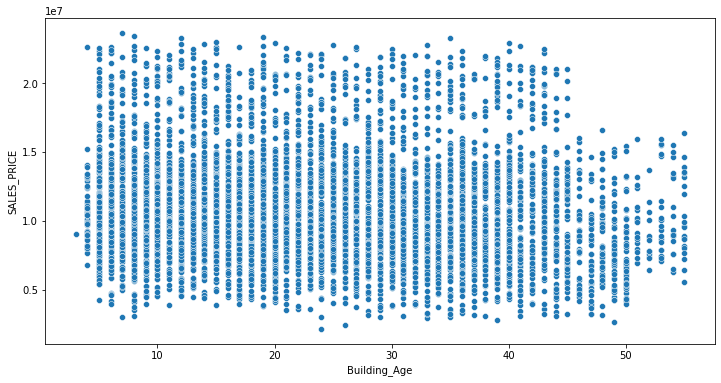

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Building_Age',y='SALES_PRICE',data=Data)

# OBSERVATION
   ## We cannnot observer and linear relationship between quality index and sales price.
   ## we can avoid using the Building age in the Modeling process

# RELATIONSHIP BETWEEN AGE OF BUILDING AND SALES PRICE

<AxesSubplot:xlabel='Building_Age', ylabel='SALES_PRICE'>

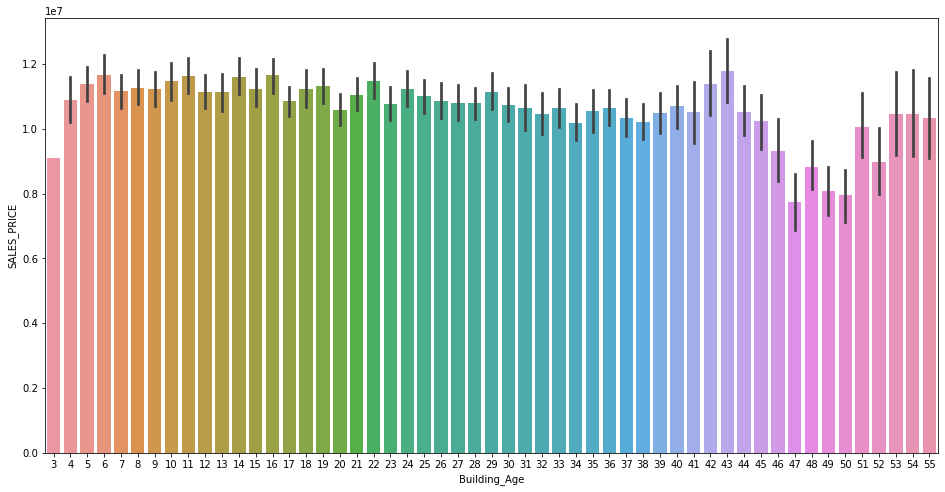

In [26]:
plt.figure(figsize=(16,8))
sns.barplot(x='Building_Age',y='SALES_PRICE',data=Data)

# OBSERVATION
   ## We can see that there is a decrease in sales price as the age of the building increaces

# HEATMAP TO CHECK THE RELATIONSHIP BETWEEN NUMERICAL DATA
    

In [27]:
Data_num=Data.select_dtypes(include=['float64','int64'])
Data_num.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Building_Age
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250,30


<AxesSubplot:>

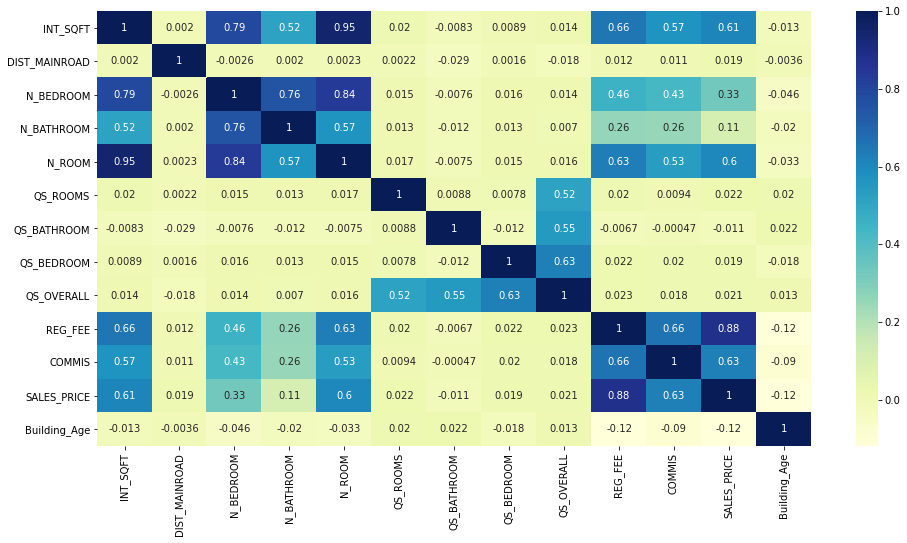

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(Data_num.corr(), cmap="YlGnBu", annot=True)

# OBSERVATION
  ## 1. We can observe a linear relationship between SQFT, Number of rooms and Building age with sales price 
  ## 2. As there is a strong correlation between SQFT and Number of rooms , We can use just SQFT in over model preparation

# Model 1

# ENCODING THE CATAGORICAL DATA
  ## 1. AREA
  ## 2. PARK FACILITIES
  ## 3. STREET CONDITIONS
  ## 4. BUILDING TYPE
  ## 5. UTILITY AVAILABE
  ## 6. MZ ZONE

In [29]:
le=LabelEncoder()
le=le.fit(Data['AREA'])
print(le.classes_)
le.classes_ = np.array(['Karapakkam','Adyar','Chrompet' ,'Velachery','KK Nagar','Anna Nagar','T Nagar'])
print(le.classes_)
Data['AREA']=le.transform(Data['AREA'])
Data['AREA']

['Adyar' 'Anna Nagar' 'Chrompet' 'KK Nagar' 'Karapakkam' 'T Nagar'
 'Velachery']
['Karapakkam' 'Adyar' 'Chrompet' 'Velachery' 'KK Nagar' 'Anna Nagar'
 'T Nagar']


0       0
1       5
2       1
3       3
4       0
       ..
7104    0
7105    3
7106    3
7107    0
7108    3
Name: AREA, Length: 7109, dtype: int64

In [30]:
le=LabelEncoder()
le=le.fit(Data['PARK_FACIL'])
print(le.classes_)
Data['PARK_FACIL']=le.transform(Data['PARK_FACIL'])
Data['PARK_FACIL']

['No' 'Yes']


0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7109, dtype: int64

In [31]:
le=LabelEncoder()
le=le.fit(Data['STREET'])
print(le.classes_)
le.classes_ = np.array(['No Access','Paved','Gravel'])
print(le.classes_)
Data['STREET']=le.transform(Data['STREET'])
Data['STREET']

['Gravel' 'No Access' 'Paved']
['No Access' 'Paved' 'Gravel']


0       1
1       2
2       2
3       1
4       2
       ..
7104    0
7105    0
7106    2
7107    1
7108    1
Name: STREET, Length: 7109, dtype: int64

In [32]:
le=LabelEncoder()
le=le.fit(Data['BUILDTYPE'])
print(le.classes_)
le.classes_ = np.array(['House', 'Others','Commercial'])
print(le.classes_)
Data['BUILDTYPE']=le.transform(Data['BUILDTYPE'])
Data['BUILDTYPE']

['Commercial' 'House' 'Others']
['House' 'Others' 'Commercial']


0       2
1       2
2       2
3       1
4       1
       ..
7104    1
7105    1
7106    0
7107    2
7108    1
Name: BUILDTYPE, Length: 7109, dtype: int64

In [33]:
le=LabelEncoder()
le=le.fit(Data['UTILITY_AVAIL'])
print(le.classes_)
le.classes_ = np.array(['ELO','NoSewr ','NoSeWa','AllPub'])
print(le.classes_)
Data['UTILITY_AVAIL']=le.transform(Data['UTILITY_AVAIL'])
Data['UTILITY_AVAIL']

['AllPub' 'ELO' 'NoSeWa' 'NoSewr ']
['ELO' 'NoSewr ' 'NoSeWa' 'AllPub']


0       3
1       3
2       0
3       1
4       3
       ..
7104    0
7105    2
7106    2
7107    0
7108    0
Name: UTILITY_AVAIL, Length: 7109, dtype: int64

In [34]:
le=LabelEncoder()
le=le.fit(Data['MZZONE'])
print(le.classes_)
le.classes_ = np.array(['A','C','I','RH','RL','RM'])
print(le.classes_)
Data['MZZONE']=le.transform(Data['MZZONE'])
Data['MZZONE']

['A' 'C' 'I' 'RH' 'RL' 'RM']
['A' 'C' 'I' 'RH' 'RL' 'RM']


0       0
1       3
2       4
3       2
4       1
       ..
7104    5
7105    3
7106    2
7107    4
7108    2
Name: MZZONE, Length: 7109, dtype: int64

# SPLITING OF DATA INTO TRAIN AND TEST

In [36]:
X=Data[['AREA','INT_SQFT','Building_Age','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']]
y=Data['SALES_PRICE']

In [37]:
X.head()

,AREA,INT_SQFT,Building_Age,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,0,1004,44,1,2,3,1,0
1,5,1986,11,0,2,3,2,3
2,1,909,20,1,2,0,2,4
3,3,1855,22,0,1,1,1,2
4,0,1226,30,1,1,3,2,1


In [38]:
y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5331 entries, 1036 to 6421
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           5331 non-null   int64
 1   INT_SQFT       5331 non-null   int64
 2   Building_Age   5331 non-null   int64
 3   PARK_FACIL     5331 non-null   int64
 4   BUILDTYPE      5331 non-null   int64
 5   UTILITY_AVAIL  5331 non-null   int64
 6   STREET         5331 non-null   int64
 7   MZZONE         5331 non-null   int64
dtypes: int64(8)
memory usage: 374.8 KB


In [40]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt



In [42]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr_r2=r2_score(y_test, y_pred)
print("R squared: ",lr_r2)
print("Average Coefficients: ",abs(lr_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred)))




R squared:  0.854859620079996
Average Coefficients:  808855.2771547777
Root Mean Squared Error:  1428187.0128465206


In [43]:
np.mean(cross_val_score(lr_model, X_train,y_train, n_jobs=1, cv=5))


0.8538270184273287

In [44]:
lcv=LassoCV(alphas=(.001, .001, .01, .1, .5, 1,10,25,30,35,40,41,42,43,44,45,46,47,48,49,50,60,100), cv=5)
lcv_model=lcv.fit(X_train,y_train)
y_pred_lcv=lcv_model.predict(X_test)
lcv_r2=r2_score(y_test,y_pred_lcv)

print("Alpha Value: ",lcv_model.alpha_)

print("R squared: ",lcv_r2)
print("Average Coefficients: ",abs(lcv_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred_lcv)))



Alpha Value:  100.0
R squared:  0.8548605829164863
Average Coefficients:  808782.5107278564
Root Mean Squared Error:  1428182.2756643104


In [45]:
rcv=RidgeCV(alphas=(.001, .001, .01, .1, .5, 1,2,3,4,5,6,7,8,9,10),cv=5)
rcv_model=rcv.fit(X_train,y_train)
y_pred_rcv=rcv_model.predict(X_test)
rcv_r2=r2_score(y_test,y_pred_rcv)

print("Alpha Value: ",rcv_model.alpha_)

print("R squared: ",rcv_r2)
print("Average Coefficients: ",abs(rcv_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred_rcv)))



Alpha Value:  7.0
R squared:  0.854880292783216
Average Coefficients:  808135.941784374
Root Mean Squared Error:  1428085.2991206034


In [46]:
Data.head()
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   int64  
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   int64  
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   int64  
 12  UTILITY_AVAIL  7109 non-null   int64  
 13  STREET         7109 non-null   int64  
 14  MZZONE         7109 non-null   int64  
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [47]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [48]:
param_grid={'max_depth':[5,6,7],
            'n_estimators': [900,1000,1100],
            'learning_rate': [0.02,0.03]}
regressor=xgb.XGBRegressor()
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)


'param_grid={\'max_depth\':[5,6,7],\n            \'n_estimators\': [900,1000,1100],\n            \'learning_rate\': [0.02,0.03]}\nregressor=xgb.XGBRegressor()\nsearch = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)\nprint("The best hyperparameters are ",search.best_params_)'

In [49]:
regressor=xgb.XGBRegressor(learning_rate=0.02,n_estimators=1100)
regressor=regressor.fit(X_train,y_train)
y_pred_XGB=regressor.predict(X_test)
y_pred_XGB

[09:10:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([13151549. , 17062094. ,  6460163. , ...,  6102018.5,  7198594.5,
        5852350. ], dtype=float32)

In [50]:
XGB_r2=r2_score(y_test, y_pred)
XGB_r2

0.854859620079996

# Model 2 

## We can see an overlap in selling prices across different catagorical feature.
## Model 2 uses OneHotEncoder over label encoder to create a more accurate model

In [51]:
area=pd.get_dummies(Data_copy['AREA'])
park=pd.get_dummies(Data_copy['PARK_FACIL'])
build=pd.get_dummies(Data_copy['BUILDTYPE'])
uti=pd.get_dummies(Data_copy['UTILITY_AVAIL'])
street=pd.get_dummies(Data_copy['STREET'])
zone=pd.get_dummies(Data_copy['MZZONE'])



In [52]:
X=Data[['INT_SQFT','Building_Age']]
X=pd.concat([X,area,park,build,uti,street,zone],axis=1)
y=Data['SALES_PRICE']
X

,INT_SQFT,Building_Age,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,No,...,NoSewr,Gravel,No Access,Paved,A,C,I,RH,RL,RM
0,1004,44,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,11,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,20,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,22,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
4,1226,30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,49,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7105,1897,9,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7106,1614,28,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
7107,787,32,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5331 entries, 5617 to 3776
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   INT_SQFT      5331 non-null   int64
 1   Building_Age  5331 non-null   int64
 2   Adyar         5331 non-null   uint8
 3   Anna Nagar    5331 non-null   uint8
 4   Chrompet      5331 non-null   uint8
 5   KK Nagar      5331 non-null   uint8
 6   Karapakkam    5331 non-null   uint8
 7   T Nagar       5331 non-null   uint8
 8   Velachery     5331 non-null   uint8
 9   No            5331 non-null   uint8
 10  Yes           5331 non-null   uint8
 11  Commercial    5331 non-null   uint8
 12  House         5331 non-null   uint8
 13  Others        5331 non-null   uint8
 14  AllPub        5331 non-null   uint8
 15  ELO           5331 non-null   uint8
 16  NoSeWa        5331 non-null   uint8
 17  NoSewr        5331 non-null   uint8
 18  Gravel        5331 non-null   uint8
 19  No Access     5331 non-n

In [54]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [55]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr_r2=r2_score(y_test, y_pred)
print("R squared: ",lr_r2)
print("Average Coefficients: ",abs(lr_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred)))





R squared:  0.954234117170371
Average Coefficients:  5.414327563438452e+18
Root Mean Squared Error:  807109.5238735783


In [56]:
lcv=LassoCV(alphas=(.001, .001, .01, .1, .5, 1,10,25,30,35,40,41,42,43,44,45,46,47,48,49,50,60,100), cv=5)
lcv_model=lcv.fit(X_train,y_train)
y_pred_lcv=lcv_model.predict(X_test)
lcv_r2=r2_score(y_test,y_pred_lcv)

print("Alpha Value: ",lcv_model.alpha_)

print("R squared: ",lcv_r2)
print("Average Coefficients: ",abs(lcv_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred_lcv)))




/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94265837218171.25, tolerance: 6080871568292.908
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88137742597377.0, tolerance: 6080871568292.908
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20689038543668.5, tolerance: 6080871568292.908
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-pa

Alpha Value:  0.001
R squared:  0.9544125118709486
Average Coefficients:  416562.8855008997
Root Mean Squared Error:  805534.9377520189


/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116549055899514.0, tolerance: 7564263317046.553
  model = cd_fast.enet_coordinate_descent(


In [57]:
rcv=RidgeCV(alphas=(.001, .001, .01, .1, .5, 1,2,3,4,5,6,7,8,9,10),cv=5)
rcv_model=rcv.fit(X_train,y_train)
y_pred_rcv=rcv_model.predict(X_test)
rcv_r2=r2_score(y_test,y_pred_rcv)

print("Alpha Value: ",rcv_model.alpha_)

print("R squared: ",rcv_r2)
print("Average Coefficients: ",abs(rcv_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred_rcv)))




Alpha Value:  0.5
R squared:  0.9544133538856939
Average Coefficients:  411803.5260268926
Root Mean Squared Error:  805527.498480243


In [58]:
regressor=xgb.XGBRegressor(learning_rate=0.02,n_estimators=1100)
regressor=regressor.fit(X_train,y_train)
y_pred_XGB=regressor.predict(X_test)
y_pred_XGB

array([12662333.,  5438710., 12951831., ..., 13314678., 11963643.,
       11037591.], dtype=float32)

In [59]:
XGB_r2=r2_score(y_test, y_pred)
XGB_r2

0.954234117170371

In [60]:
RMSE=sqrt(mean_squared_error(y_test,y_pred_XGB))
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test,y_pred_XGB)))


Root Mean Squared Error:  293069.6109110162


# A program to predict the selling price range ,by taking the input from the user 


In [62]:
print('Input The Area of the property (Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery) :')
a=input()

Input The Area of the property (Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery) :
Anna Nagar


In [63]:
print('Input the SQ FT of the property : ')
b=input()

Input the SQ FT of the property : 
1500


In [64]:
print('input Yes or No if there is park facilities :')
c=input()

input Yes or No if there is park facilities :
Yes


In [65]:
print('Input the type of building(Commercial,House,Others) :')
d=input()

Input the type of building(Commercial,House,Others) :
House


In [66]:
print('Input the Utility available (AllPub,ELO,NoSeWa,NoSewr) :')
e=input()

Input the Utility available (AllPub,ELO,NoSeWa,NoSewr) :
ELO


In [67]:
print('Input the type of street(Gravel,No Access,Paved) :')
f=input()

Input the type of street(Gravel,No Access,Paved) :
Gravel


In [68]:
print('Input the MZZONE (A,C,I,RH,RL,RM) :')
g=input()


Input the MZZONE (A,C,I,RH,RL,RM) :
RH


In [69]:
print('Input the age of the building : ')
h=input()

Input the age of the building : 
20


In [70]:
User_input=pd.DataFrame(columns=['INT_SQFT', 'Building_Age', 'Adyar', 'Anna Nagar', 'Chrompet',
       'KK Nagar', 'Karapakkam', 'T Nagar', 'Velachery', 'No', 'Yes',
       'Commercial', 'House', 'Others', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr ',
       'Gravel', 'No Access', 'Paved', 'A', 'C', 'I', 'RH', 'RL', 'RM'],index=[0])
User_input

,INT_SQFT,Building_Age,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,No,...,NoSewr,Gravel,No Access,Paved,A,C,I,RH,RL,RM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
User_input['INT_SQFT'].iloc[0]=b
User_input['Building_Age'].iloc[0]=h
if a=='Adyar':
    User_input['Adyar'].iloc[0]=1
else:
    User_input['Adyar'].iloc[0]=0 
    
if a=='Anna Nagar':
    User_input['Anna Nagar'].iloc[0]=1
else:
    User_input['Anna Nagar'].iloc[0]=0 

if a=='Chrompet':
    User_input['Chrompet'].iloc[0]=1
else:
    User_input['Chrompet'].iloc[0]=0 
    
if a=='KK Nagar':
    User_input['KK Nagar'].iloc[0]=1
else:
    User_input['KK Nagar'].iloc[0]=0 

if a=='Karapakkam':
    User_input['Karapakkam'].iloc[0]=1
else:
    User_input['Karapakkam'].iloc[0]=0 

if a=='T Nagar':
    User_input['T Nagar'].iloc[0]=1
else:
    User_input['T Nagar'].iloc[0]=0 

if a=='Velachery':
    User_input['Velachery'].iloc[0]=1
else:
    User_input['Velachery'].iloc[0]=0 

if c=='No':
    User_input['No'].iloc[0]=1
else:
    User_input['No'].iloc[0]=0 

if c=='Yes':
    User_input['Yes'].iloc[0]=1
else:
    User_input['Yes'].iloc[0]=0 

if d=='Commercial':
    User_input['Commercial'].iloc[0]=1
else:
    User_input['Commercial'].iloc[0]=0 

if d=='House':
    User_input['House'].iloc[0]=1
else:
    User_input['House'].iloc[0]=0 

if d=='Others':
    User_input['Others'].iloc[0]=1
else:
    User_input['Others'].iloc[0]=0 
    
if e=='AllPub':
    User_input['AllPub'].iloc[0]=1
else:
    User_input['AllPub'].iloc[0]=0 
    
if e=='ELO':
    User_input['ELO'].iloc[0]=1
else:
    User_input['ELO'].iloc[0]=0 

if e=='NoSeWa':
    User_input['NoSeWa'].iloc[0]=1
else:
    User_input['NoSeWa'].iloc[0]=0

if e=='NoSewr':
    User_input['NoSewr '].iloc[0]=1
else:
    User_input['NoSewr '].iloc[0]=0 

if f=='Gravel':
    User_input['Gravel'].iloc[0]=1
else:
    User_input['Gravel'].iloc[0]=0 

if f=='No Access':
    User_input['No Access'].iloc[0]=1
else:
    User_input['No Access'].iloc[0]=0     
    
if f=='Paved':
    User_input['Paved'].iloc[0]=1
else:
    User_input['Paved'].iloc[0]=0       
    
if g=='A':
    User_input['A'].iloc[0]=1
else:
    User_input['A'].iloc[0]=0      

if g=='C':
    User_input['C'].iloc[0]=1
else:
    User_input['C'].iloc[0]=0  

if g=='I':
    User_input['I'].iloc[0]=1
else:
    User_input['I'].iloc[0]=0 

if g=='RH':
    User_input['RH'].iloc[0]=1
else:
    User_input['RH'].iloc[0]=0
    
if g=='RL':
    User_input['RL'].iloc[0]=1
else:
    User_input['RL'].iloc[0]=0

if g=='RM':
    User_input['RM'].iloc[0]=1
else:
    User_input['RM'].iloc[0]=0

User_input

,INT_SQFT,Building_Age,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,No,...,NoSewr,Gravel,No Access,Paved,A,C,I,RH,RL,RM
0,1500,20,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [72]:
User_input=Scaler.transform(User_input)

In [73]:
User_XGB_y=regressor.predict(User_input)
User_XGB_y

array([11115229.], dtype=float32)

In [74]:
Max_sell=RMSE+User_XGB_y
Min_sell=User_XGB_y-RMSE
print(Max_sell,Min_sell)

[11408299.] [10822159.]


In [75]:
print(f'The selling price range of the user specified property is between {Max_sell} AND {Min_sell}')

The selling price range of the user specified property is between [11408299.] AND [10822159.]


# Result
## Model 2 performs surprisingly better than model 1 as it take into account that the sales price can be overlapping between different catagories 
## We have obtained a r2 value of 0.955 which indicated a well fitted model
## We have also designed a program to get the user inputs details of the property and compute the selling price range of the perticular property 